In [2]:
import pandas
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
import sklearn.impute 
import sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder 


from sklearn.impute import SimpleImputer
%matplotlib inline

### import data

In [3]:
data_train = pandas.read_csv('./Data/salary.train.csv', index_col='id')
data_test = pandas.read_csv('./Data/salary.test.csv', index_col='id')
data_live = pandas.read_csv('./Data/high_salary.live.csv', index_col='id')

### explore data

In [4]:
data_train.dtypes

social-security-number    float64
house-number              float64
age-group                 float64
workclass                  object
fnlwgt                    float64
education                  object
education-num             float64
marital-status             object
occupation                 object
relationship               object
race                       object
sex                        object
capitalgain               float64
capitalloss               float64
hoursperweek              float64
native-country-code        object
native-country             object
label                     float64
dtype: object

In [5]:
for feature in data_train:
    print(data_train[feature].value_counts())
    print('---------')

social-security-number
987463818.0    1
301692972.0    1
746670506.0    1
833224040.0    1
912989550.0    1
              ..
759703144.0    1
384262667.0    1
855279382.0    1
390891990.0    1
657404344.0    1
Name: count, Length: 16708, dtype: int64
---------
house-number
4668.0    8
6442.0    7
3096.0    7
5201.0    7
5439.0    7
         ..
8458.0    1
2556.0    1
7072.0    1
1512.0    1
8019.0    1
Name: count, Length: 8059, dtype: int64
---------
age-group
2.0    4515
1.0    4172
3.0    3310
0.0    2496
4.0    2220
Name: count, dtype: int64
---------
workclass
private             11278
self-emp-not-inc     1385
local-gov            1176
self-emp-inc          770
state-gov             707
federal-gov           547
without-pay             7
never-worked            3
Name: count, dtype: int64
---------
fnlwgt
148995.0    10
125892.0    10
164190.0     9
193882.0     9
111483.0     9
            ..
114011.0     1
191477.0     1
134639.0     1
268996.0     1
75065.0      1
Name: count,

In [6]:
numeric_features = [
    'social-security-number',
    'house-number',
    'fnlwgt'
]
categorical_features = [
    'age-group',
    'education',
    'education-num',
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code',
    'native-country',
    'capitalgain',  
    'capitalloss',  
    'hoursperweek' 
]

### Missing value

Outlier counts and bounds for each feature:
social-security-number: 0 outliers (Lower bound: -348360678.62, Upper bound: 1453456072.38)
house-number: 0 outliers (Lower bound: -4843.12, Upper bound: 14905.88)
fnlwgt: 511 outliers (Lower bound: -60459.75, Upper bound: 415334.25)


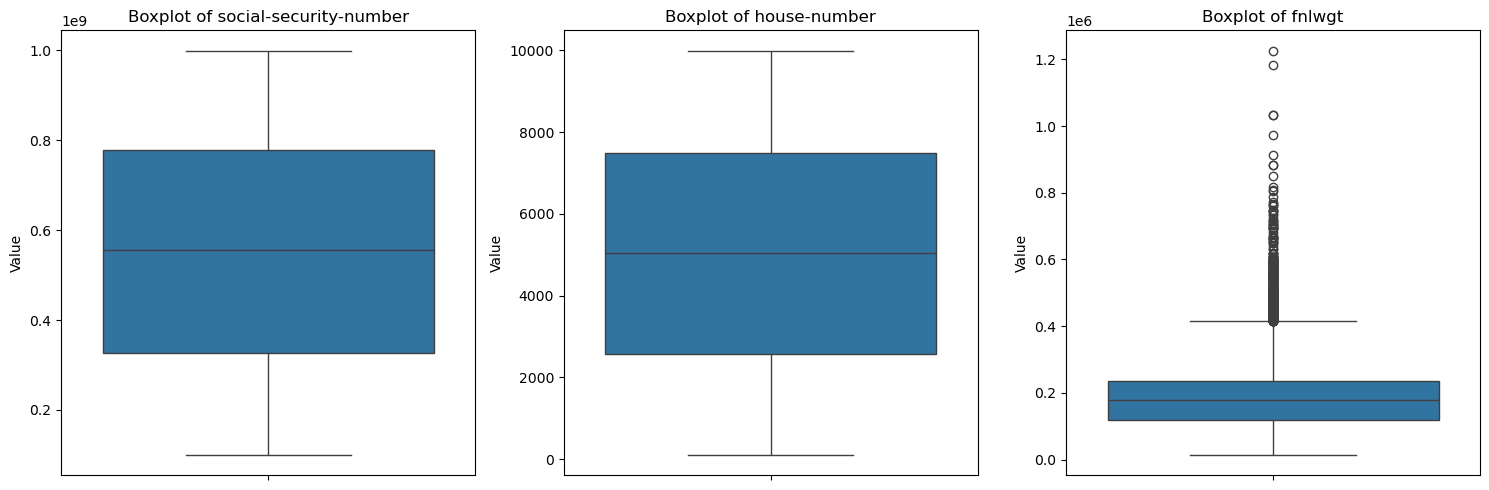

In [7]:
from matplotlib import pyplot as plt


def count_outliers(series):
    try:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return len(outliers), lower_bound, upper_bound
    except Exception as e:
        print(f"Error processing {series.name}: {e}")
        return 0, None, None

# Calculate and print outlier counts
print("Outlier counts and bounds for each feature:")
for feature in numeric_features:
    count, lower, upper = count_outliers(data_train[feature])
    if lower is not None and upper is not None:
        print(f"{feature}: {count} outliers (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")
    else:
        print(f"{feature}: Skipped due to error in outlier calculation")

# Set up the plot
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

### stratergy
 **Median for**
1. house-number and 
2. Box and fnlwgt 

**Placeholder**
- using ' 0 ' as placeholder
1. social-security-number




In [8]:
ssn_imputer = SimpleImputer(strategy='constant', fill_value=0)
other_imputer = SimpleImputer(strategy='median')


### Train

In [9]:
data_train_numerical_features =data_train[numeric_features]
data_train_numerical_features.isna().sum(axis='index')

social-security-number    12
house-number              20
fnlwgt                    17
dtype: int64

In [10]:
data_train_ssn = pandas.DataFrame(
    data=ssn_imputer.fit_transform(data_train[['social-security-number']]),
    columns=['social-security-number'],
    index=data_train.index
)
data_train_other = pandas.DataFrame(
    data=other_imputer.fit_transform(data_train[['house-number', 'fnlwgt']]),
    columns=['house-number', 'fnlwgt'],
    index=data_train.index
)
data_train_numerical_features = pandas.concat([data_train_ssn, data_train_other], axis=1)
data_train_numerical_features.isna().sum(axis='index')


social-security-number    0
house-number              0
fnlwgt                    0
dtype: int64

***Outlier***

In [11]:
import numpy as np

# สมมติว่าข้อมูลของคุณอยู่ใน pandas DataFrame ชื่อ 'df'

# ใช้ np.log1p() และเขียนทับค่าในคอลัมน์ 'fnlwgt' เดิมไปเลย
data_train['fnlwgt'] = np.log1p(data_train['fnlwgt'])

Outlier counts and bounds for each feature:
social-security-number: 0 outliers (Lower bound: -348360678.62, Upper bound: 1453456072.38)
house-number: 0 outliers (Lower bound: -4843.12, Upper bound: 14905.88)
fnlwgt: 939 outliers (Lower bound: 10.63, Upper bound: 13.42)


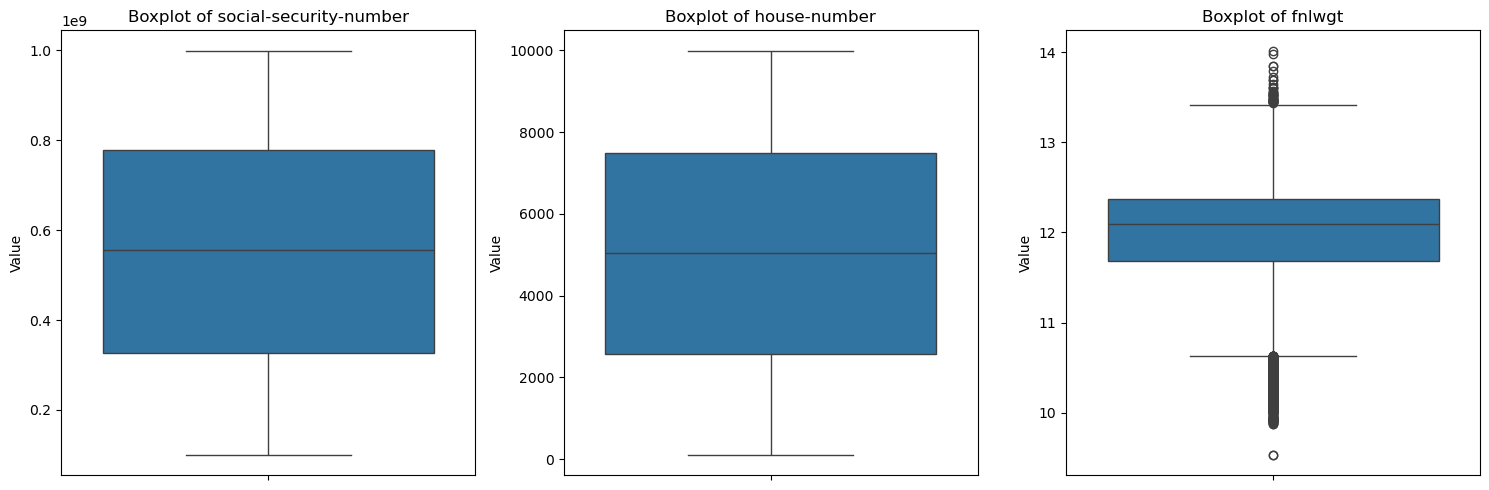

In [12]:
from matplotlib import pyplot as plt


def count_outliers(series):
    try:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return len(outliers), lower_bound, upper_bound
    except Exception as e:
        print(f"Error processing {series.name}: {e}")
        return 0, None, None

# Calculate and print outlier counts
print("Outlier counts and bounds for each feature:")
for feature in numeric_features:
    count, lower, upper = count_outliers(data_train[feature])
    if lower is not None and upper is not None:
        print(f"{feature}: {count} outliers (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")
    else:
        print(f"{feature}: Skipped due to error in outlier calculation")

# Set up the plot
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

### Test

Outlier

Outlier counts and bounds for each feature:
social-security-number: 0 outliers (Lower bound: -331478746.00, Upper bound: 1429637784.00)
house-number: 0 outliers (Lower bound: -4800.00, Upper bound: 14712.00)
fnlwgt: 109 outliers (Lower bound: -59730.75, Upper bound: 412747.25)


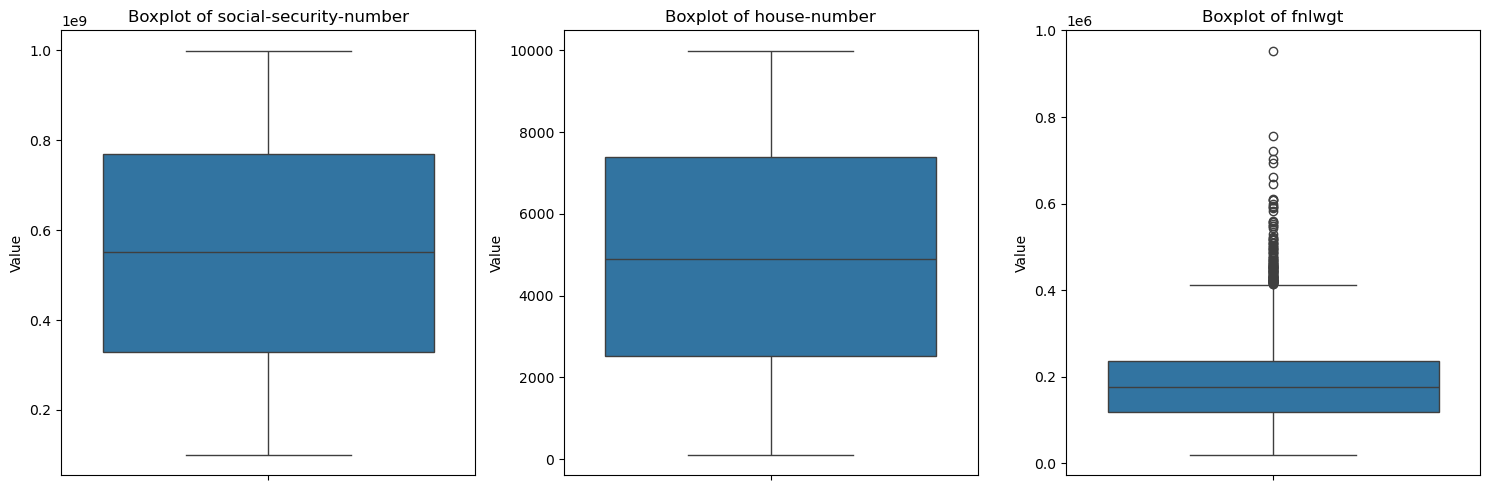

In [13]:
from matplotlib import pyplot as plt


def count_outliers(series):
    try:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return len(outliers), lower_bound, upper_bound
    except Exception as e:
        print(f"Error processing {series.name}: {e}")
        return 0, None, None

# Calculate and print outlier counts
print("Outlier counts and bounds for each feature:")
for feature in numeric_features:
    count, lower, upper = count_outliers(data_test[feature])
    if lower is not None and upper is not None:
        print(f"{feature}: {count} outliers (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")
    else:
        print(f"{feature}: Skipped due to error in outlier calculation")

# Set up the plot
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_test[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

Missing value

In [14]:
data_test[numeric_features].isna().sum(axis='index')

social-security-number    2
house-number              7
fnlwgt                    6
dtype: int64

In [15]:
data_test_ssn = pandas.DataFrame(
    data=ssn_imputer.fit_transform(data_test[['social-security-number']]),
    columns=['social-security-number'],
    index=data_test.index
)
data_test_other = pandas.DataFrame(
    data=other_imputer.fit_transform(data_test[['house-number', 'fnlwgt']]),
    columns=['house-number', 'fnlwgt'],
    index=data_test.index
)
data_test_numerical_features = pandas.concat([data_test_ssn, data_test_other], axis=1)
data_test_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
fnlwgt                    0
dtype: int64

***Outlier***

In [16]:
import numpy as np

# สมมติว่าข้อมูลของคุณอยู่ใน pandas DataFrame ชื่อ 'df'

# ใช้ np.log1p() และเขียนทับค่าในคอลัมน์ 'fnlwgt' เดิมไปเลย
data_test['fnlwgt'] = np.log1p(data_test['fnlwgt'])

Outlier counts and bounds for each feature:
social-security-number: 0 outliers (Lower bound: -331478746.00, Upper bound: 1429637784.00)
house-number: 0 outliers (Lower bound: -4800.00, Upper bound: 14712.00)
fnlwgt: 222 outliers (Lower bound: 10.63, Upper bound: 13.41)


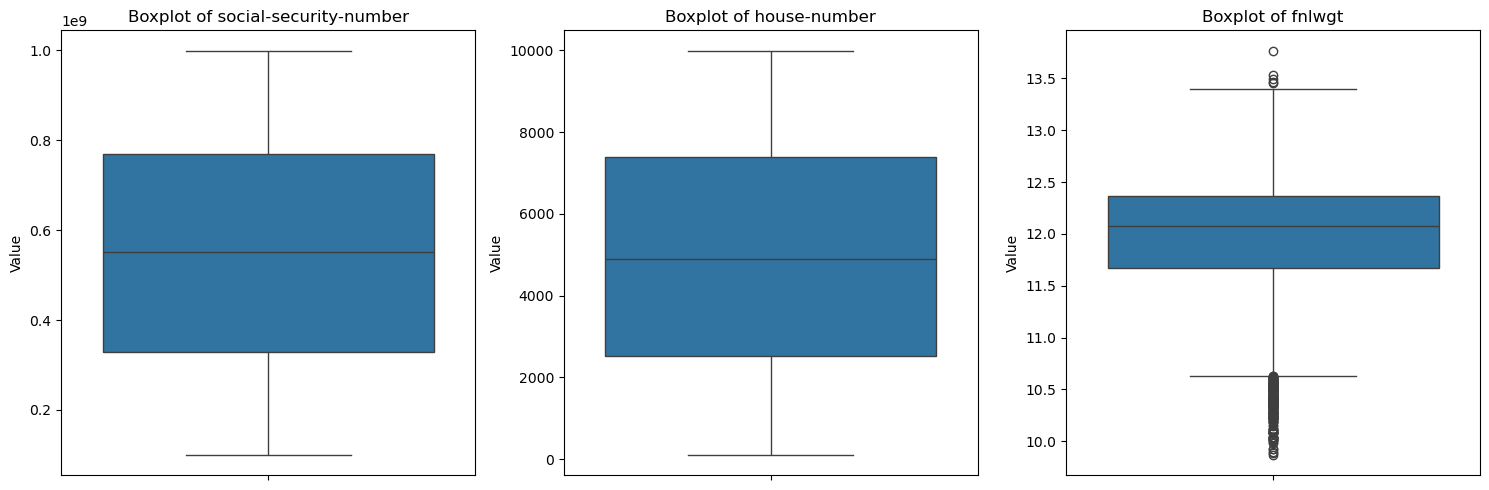

In [17]:
from matplotlib import pyplot as plt


def count_outliers(series):
    try:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return len(outliers), lower_bound, upper_bound
    except Exception as e:
        print(f"Error processing {series.name}: {e}")
        return 0, None, None

# Calculate and print outlier counts
print("Outlier counts and bounds for each feature:")
for feature in numeric_features:
    count, lower, upper = count_outliers(data_test[feature])
    if lower is not None and upper is not None:
        print(f"{feature}: {count} outliers (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")
    else:
        print(f"{feature}: Skipped due to error in outlier calculation")

# Set up the plot
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_test[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

### Live

Missing value

In [18]:
data_live[numeric_features].isna().sum(axis='index')

social-security-number    2
house-number              9
fnlwgt                    4
dtype: int64

In [19]:
data_live_ssn = pandas.DataFrame(
    data=ssn_imputer.fit_transform(data_live[['social-security-number']]),
    columns=['social-security-number'],
    index=data_live.index
)
data_live_other = pandas.DataFrame(
    data=other_imputer.fit_transform(data_live[['house-number', 'fnlwgt']]),
    columns=['house-number', 'fnlwgt'],
    index=data_live.index
)
data_live_numerical_features = pandas.concat([data_live_ssn, data_live_other], axis=1)
data_live_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
fnlwgt                    0
dtype: int64

Outlier

Outlier counts and bounds for each feature:
social-security-number: 0 outliers (Lower bound: -342040115.50, Upper bound: 1445241888.50)
house-number: 0 outliers (Lower bound: -4836.62, Upper bound: 14882.38)
fnlwgt: 196 outliers (Lower bound: -61375.25, Upper bound: 416942.75)


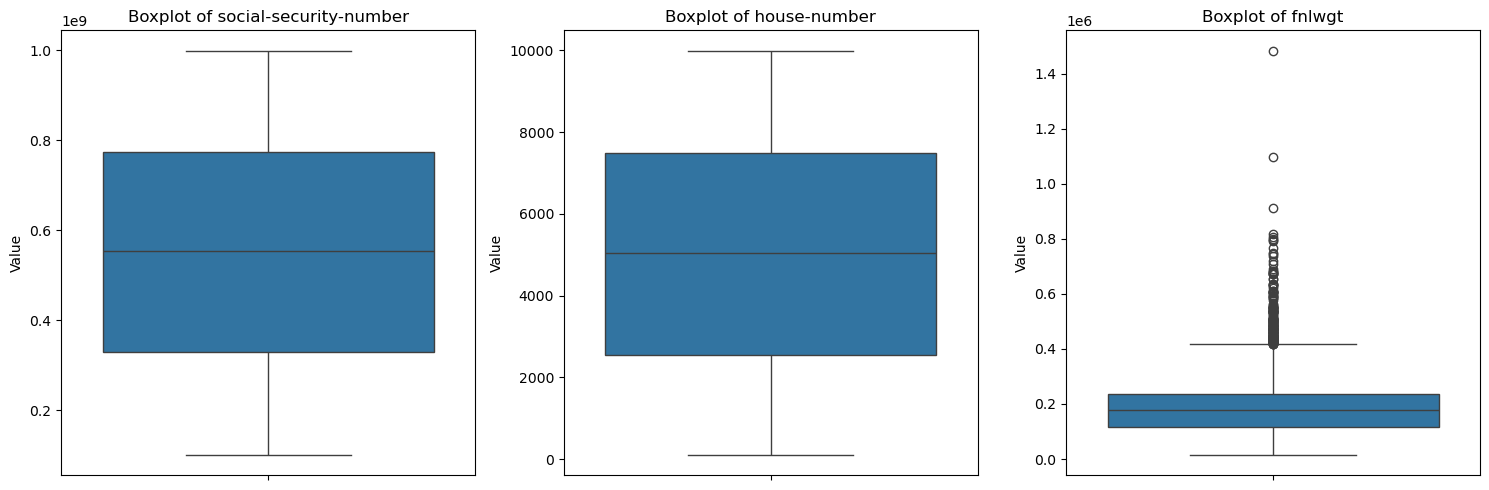

In [20]:
from matplotlib import pyplot as plt


def count_outliers(series):
    try:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return len(outliers), lower_bound, upper_bound
    except Exception as e:
        print(f"Error processing {series.name}: {e}")
        return 0, None, None

# Calculate and print outlier counts
print("Outlier counts and bounds for each feature:")
for feature in numeric_features:
    count, lower, upper = count_outliers(data_live[feature])
    if lower is not None and upper is not None:
        print(f"{feature}: {count} outliers (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")
    else:
        print(f"{feature}: Skipped due to error in outlier calculation")

# Set up the plot
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_live[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [21]:
import numpy as np

# สมมติว่าข้อมูลของคุณอยู่ใน pandas DataFrame ชื่อ 'df'

# ใช้ np.log1p() และเขียนทับค่าในคอลัมน์ 'fnlwgt' เดิมไปเลย
data_live['fnlwgt'] = np.log1p(data_live['fnlwgt'])

Outlier counts and bounds for each feature:
social-security-number: 0 outliers (Lower bound: -342040115.50, Upper bound: 1445241888.50)
house-number: 0 outliers (Lower bound: -4836.62, Upper bound: 14882.38)
fnlwgt: 391 outliers (Lower bound: 10.63, Upper bound: 13.43)


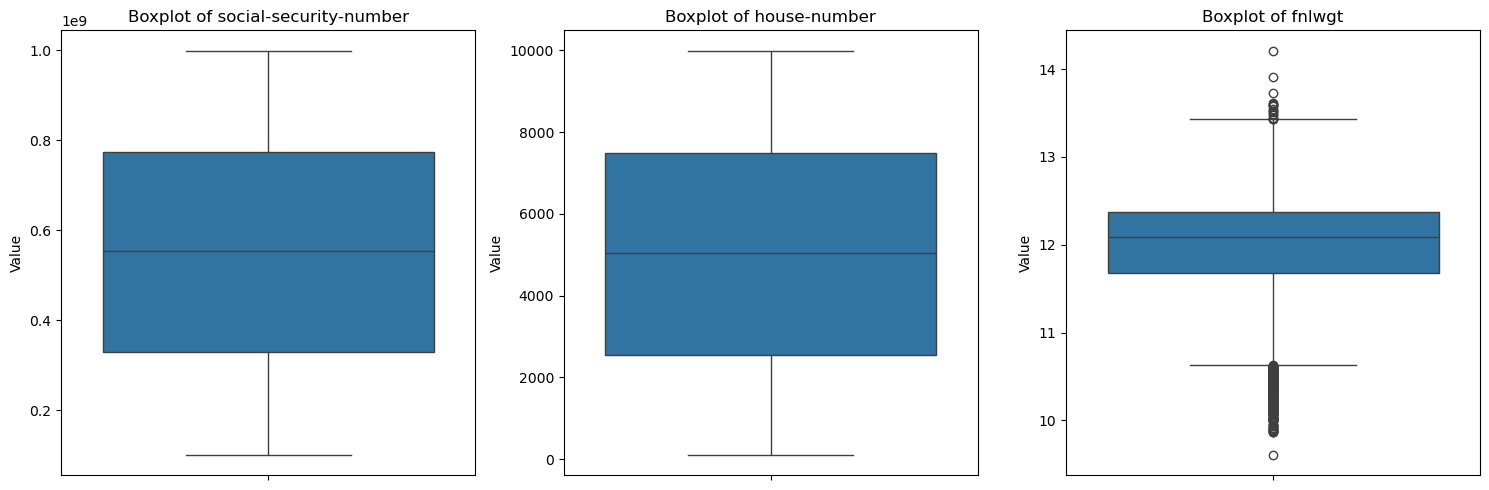

In [22]:
from matplotlib import pyplot as plt


def count_outliers(series):
    try:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]
        return len(outliers), lower_bound, upper_bound
    except Exception as e:
        print(f"Error processing {series.name}: {e}")
        return 0, None, None

# Calculate and print outlier counts
print("Outlier counts and bounds for each feature:")
for feature in numeric_features:
    count, lower, upper = count_outliers(data_live[feature])
    if lower is not None and upper is not None:
        print(f"{feature}: {count} outliers (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")
    else:
        print(f"{feature}: Skipped due to error in outlier calculation")

# Set up the plot
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data_live[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

### Handling of missing values for Categorical data

In [23]:
categorical_features = [
    'age-group',
    'education',
    'education-num',
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code',
    'native-country',
    'capitalgain',  
    'capitalloss',  
    'hoursperweek' 
]

In [24]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer

SimpleImputer(strategy='most_frequent')

In [25]:
data_train_categorical_features = data_train[categorical_features]
data_test_categorical_features = data_test[categorical_features]
data_live_categorical_features = data_live[categorical_features]

Training

In [26]:
data_train_categorical_features.isna().sum(axis='index')

age-group                7
education               16
education-num           12
workclass              847
marital-status          21
occupation             845
relationship            15
race                    14
sex                     15
native-country-code    322
native-country         323
capitalgain             20
capitalloss             14
hoursperweek            19
dtype: int64

In [27]:
categorical_imputer.fit(data_train_categorical_features)
data_train_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_train_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index =data_train_categorical_features.index
)
data_train_categorical_features.isna().sum(axis='index')

age-group              0
education              0
education-num          0
workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
capitalgain            0
capitalloss            0
hoursperweek           0
dtype: int64

Testing

In [28]:
data_test_categorical_features.isna().sum(axis='index')

age-group                6
education                4
education-num            2
workclass              210
marital-status           2
occupation             209
relationship             6
race                     8
sex                      7
native-country-code     77
native-country          75
capitalgain              3
capitalloss              7
hoursperweek             2
dtype: int64

In [29]:
categorical_imputer.fit(data_test_categorical_features)
data_test_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_test_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index =data_test_categorical_features.index
)
data_test_categorical_features.isna().sum(axis='index')

age-group              0
education              0
education-num          0
workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
capitalgain            0
capitalloss            0
hoursperweek           0
dtype: int64

Live

In [30]:
data_live_categorical_features.isna().sum(axis='index')

age-group               13
education                7
education-num            8
workclass              345
marital-status           9
occupation             347
relationship            13
race                     7
sex                      7
native-country-code    122
native-country         123
capitalgain              8
capitalloss             10
hoursperweek            13
dtype: int64

In [31]:
categorical_imputer.fit(data_live_categorical_features)
data_live_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_live_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index =data_live_categorical_features.index
)
data_live_categorical_features.isna().sum(axis='index')

age-group              0
education              0
education-num          0
workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
capitalgain            0
capitalloss            0
hoursperweek           0
dtype: int64

## Reconstruction of data sets

In [32]:
data_train = (
    data_train_categorical_features
    .join(data_train_numerical_features)
    .join(data_train['label'])
)
data_test = (
    data_test_categorical_features
    .join(data_test_numerical_features)
    .join(data_test['label'])
)
data_live = (
    data_live_categorical_features
    .join(data_live_numerical_features)
)

## Encoding

Ordinal encoding (if need)

In [33]:
ordinal_features = ['age-group', 'education', 'education-num','capitalgain', 'capitalloss', 'hoursperweek']

In [34]:
for feature in ordinal_features:
    possible_values = data_train[feature].unique()
    print(f"{feature:20s} {possible_values.size:2d} {possible_values}")

age-group             5 [3.0 2.0 1.0 0.0 4.0]
education            16 ['doctorate' 'masters' 'some-college' 'bachelors' 'hs-grad' 'assoc-voc'
 '12th' 'prof-school' '7th-8th' '11th' '10th' 'assoc-acdm' '9th' '5th-6th'
 '1st-4th' 'preschool']
education-num        16 [16.0 14.0 10.0 13.0 9.0 11.0 8.0 15.0 4.0 7.0 6.0 12.0 5.0 3.0 2.0 1.0]
capitalgain           5 [0.0 4.0 3.0 2.0 1.0]
capitalloss           5 [0.0 3.0 2.0 1.0 4.0]
hoursperweek          5 [3.0 2.0 0.0 1.0 4.0]


We seeing that the education-num is the encoded verion of education so we can drop education

Drop 'education'

In [35]:
data_train = data_train.drop(columns=['education'])
data_test = data_test.drop(columns=['education'])   
data_live = data_live.drop(columns=['education'])   

- Update `ordinal_feture`

In [36]:
ordinal_features = ['age-group', 'education-num','capitalgain', 'capitalloss', 'hoursperweek']

In [37]:
print(data_train[ordinal_features])
print('--------------------------')
print(data_test[ordinal_features])
print('--------------------------')
print(data_live[ordinal_features])

      age-group education-num capitalgain capitalloss hoursperweek
id                                                                
26890       3.0          16.0         0.0         0.0          3.0
933         3.0          14.0         4.0         0.0          3.0
25596       2.0          10.0         0.0         0.0          2.0
12949       2.0          13.0         0.0         0.0          3.0
6681        1.0           9.0         0.0         0.0          2.0
...         ...           ...         ...         ...          ...
8695        0.0          10.0         0.0         0.0          2.0
2192        2.0          10.0         2.0         0.0          2.0
8250        0.0           9.0         0.0         0.0          2.0
18511       2.0          14.0         0.0         0.0          0.0
16074       2.0           8.0         0.0         0.0          3.0

[16720 rows x 5 columns]
--------------------------
      age-group education-num capitalgain capitalloss hoursperweek
id       

## Onehot encoding

In [38]:
nominal_features = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code',
    'native-country',
]

In [39]:
for feature in nominal_features:
    possible_values = data_train[feature].unique()
    print(f"{feature:20s} {possible_values.size:2d} {possible_values}")

workclass             8 ['state-gov' 'private' 'self-emp-inc' 'self-emp-not-inc' 'federal-gov'
 'local-gov' 'without-pay' 'never-worked']
marital-status        7 ['divorced' 'never-married' 'married-civ-spouse' 'separated' 'widowed'
 'married-spouse-absent' 'married-af-spouse']
occupation           14 ['prof-specialty' 'tech-support' 'exec-managerial' 'machine-op-inspct'
 'sales' 'handlers-cleaners' 'craft-repair' 'other-service' 'adm-clerical'
 'transport-moving' 'protective-serv' 'farming-fishing' 'priv-house-serv'
 'armed-forces']
relationship          6 ['own-child' 'unmarried' 'not-in-family' 'husband' 'wife' 'other-relative']
race                  5 ['white' 'black' 'asian-pac-islander' 'other' 'amer-indian-eskimo']
sex                   2 ['male' 'female']
native-country-code  40 ['USA' 'HTI' 'GRC' 'ZAF' 'IND' 'CHN' 'LAO' 'JPN' 'PHL' 'COL' 'VNM' 'PRI'
 'YUG' 'CUB' 'DUE' 'ITA' 'TWN' 'SLV' 'JAM' 'CAN' 'MEX' 'PRT' 'IRN' 'GBR'
 'POL' 'GTM' 'KHM' 'PER' 'ECU' 'DOM' 'HUN' 'TTO' 'IRL' '

We cannot use normal encoding in to `native-country, capitalgain`, its will make the model mor complicated (many collumns will be create)  
and We should drop `native-country-code` becuase its redundant

In [40]:
data_train = data_train.drop(columns=['native-country-code'])
data_test = data_test.drop(columns=['native-country-code'])   
data_live = data_live.drop(columns=['native-country-code'])   

### use normal encoding

In [41]:
normal_nominal_features = [
    'occupation',
    'workclass',
    'marital-status',
    'relationship',
    'race',
    'sex',
]

In [42]:
for feature in normal_nominal_features:
    possible_values = data_train[feature].unique()
    print(f"{feature:20s} {possible_values.size:2d} {possible_values}")

occupation           14 ['prof-specialty' 'tech-support' 'exec-managerial' 'machine-op-inspct'
 'sales' 'handlers-cleaners' 'craft-repair' 'other-service' 'adm-clerical'
 'transport-moving' 'protective-serv' 'farming-fishing' 'priv-house-serv'
 'armed-forces']
workclass             8 ['state-gov' 'private' 'self-emp-inc' 'self-emp-not-inc' 'federal-gov'
 'local-gov' 'without-pay' 'never-worked']
marital-status        7 ['divorced' 'never-married' 'married-civ-spouse' 'separated' 'widowed'
 'married-spouse-absent' 'married-af-spouse']
relationship          6 ['own-child' 'unmarried' 'not-in-family' 'husband' 'wife' 'other-relative']
race                  5 ['white' 'black' 'asian-pac-islander' 'other' 'amer-indian-eskimo']
sex                   2 ['male' 'female']


In [43]:
nominal_categories = [
    ['prof-specialty', 'tech-support', 'exec-managerial', 'machine-op-inspct',
     'sales', 'handlers-cleaners', 'craft-repair', 'other-service', 'adm-clerical',
     'transport-moving', 'protective-serv', 'farming-fishing', 'priv-house-serv',
     'armed-forces'],
     ['state-gov', 'private', 'self-emp-inc', 'self-emp-not-inc', 'federal-gov',
      'local-gov', 'without-pay', 'never-worked'],
      ['divorced', 'never-married', 'married-civ-spouse', 'separated', 'widowed',
       'married-spouse-absent', 'married-af-spouse'],
    ['not-in-family', 'husband', 'other-relative', 'wife', 'own-child', 'unmarried'],  # relationship
    ['white', 'amer-indian-eskimo', 'black', 'asian-pac-islander', 'other'],  # race
    ['male', 'female'],  # sex
]


In [44]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=nominal_categories, sparse_output=False, handle_unknown='ignore')
onehot_encoder.fit(
    X=data_train[normal_nominal_features]
)

OneHotEncoder(categories=[['prof-specialty', 'tech-support', 'exec-managerial',
                           'machine-op-inspct', 'sales', 'handlers-cleaners',
                           'craft-repair', 'other-service', 'adm-clerical',
                           'transport-moving', 'protective-serv',
                           'farming-fishing', 'priv-house-serv',
                           'armed-forces'],
                          ['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['divorced', 'never-married', 'married-civ-spouse',
                           'separated', 'widowed', 'married-spouse-absent',
                           'married-af-spouse'],
                          ['not-in-family', 'husband', 'other-relative', 'wife',
                           'own-child', 'unmarried'],
                          ['white', 'amer-indian-eskimo', 'black',
                           'asian-pac-islander', 'other'],
                          ['male', 'female']],
              handle_unknown='ignore', sparse_output=False)

- Fit to all data

In [45]:
data_train_normal_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_train[normal_nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_train.index
)
data_test_normal_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_test[normal_nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_test.index
)
data_live_normal_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_live[normal_nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_live.index
)
data_train_normal_nominal_features

,occupation_prof-specialty,occupation_tech-support,occupation_exec-managerial,occupation_machine-op-inspct,occupation_sales,occupation_handlers-cleaners,occupation_craft-repair,occupation_other-service,occupation_adm-clerical,occupation_transport-moving,...,relationship_wife,relationship_own-child,relationship_unmarried,race_white,race_amer-indian-eskimo,race_black,race_asian-pac-islander,race_other,sex_male,sex_female
id,,,,,,,,,,,,,,,,,,,,,
26890,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
933,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6681,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### use Lumping Categories

- training

In [46]:
top_5_countries = data_train['native-country'].value_counts().index[:5]
print("Top 5 countries:", top_5_countries)

Top 5 countries: Index(['united-states', 'mexico', 'philippines', 'germany', 'canada'], dtype='object', name='native-country')


In [47]:
data_train['native-country'] = np.where(
    data_train['native-country'].isin(top_5_countries), 
    data_train['native-country'], 
    'Other'
)

data_test['native-country'] = np.where(
    data_test['native-country'].isin(top_5_countries), 
    data_test['native-country'], 
    'Other'
)

data_live['native-country'] = np.where(
    data_live['native-country'].isin(top_5_countries), 
    data_live['native-country'], 
    'Other'
)
data_train['native-country']

id
26890    united-states
933      united-states
25596    united-states
12949    united-states
6681     united-states
             ...      
8695     united-states
2192     united-states
8250     united-states
18511    united-states
16074            Other
Name: native-country, Length: 16720, dtype: object

Aply nominal encoder

In [48]:
from sklearn.preprocessing import OneHotEncoder

Lumping_nominal_features = ['native-country']

nominal_categories = [
    ['united-states', 'Other', 'mexico', 'philippines', 'germany', 'canada']
]

onehot_encoder = OneHotEncoder(
    categories=nominal_categories,
    sparse_output=False,
    handle_unknown='ignore'
)

onehot_encoder.fit(data_train[Lumping_nominal_features])


OneHotEncoder(categories=[['united-states', 'Other', 'mexico', 'philippines',
                           'germany', 'canada']],
              handle_unknown='ignore', sparse_output=False)

In [49]:
data_train[Lumping_nominal_features] 

,native-country
id,
26890,united-states
933,united-states
25596,united-states
12949,united-states
6681,united-states
...,...
8695,united-states
2192,united-states
8250,united-states


In [50]:
import pandas as pd

# Transform data
encoded_train = pd.DataFrame(
    data    = onehot_encoder.transform(data_train[Lumping_nominal_features]),
    columns = onehot_encoder.get_feature_names_out(Lumping_nominal_features),
    index   = data_train.index
)
encoded_test = pd.DataFrame(
    data    = onehot_encoder.transform(data_test[Lumping_nominal_features]),
    columns = onehot_encoder.get_feature_names_out(Lumping_nominal_features),
    index   = data_test.index
)
encoded_live = pd.DataFrame(
    data    = onehot_encoder.transform(data_live[Lumping_nominal_features]),
    columns = onehot_encoder.get_feature_names_out(Lumping_nominal_features),
    index   = data_live.index
)

# Drop the original categorical column and join the encoded columns
data_train = pd.concat([data_train.drop(columns=Lumping_nominal_features), encoded_train], axis=1)
data_test  = pd.concat([data_test.drop(columns=Lumping_nominal_features),  encoded_test],  axis=1)
data_live  = pd.concat([data_live.drop(columns=Lumping_nominal_features),  encoded_live],  axis=1)



In [51]:
data_train.dtypes

age-group                        object
education-num                    object
workclass                        object
marital-status                   object
occupation                       object
relationship                     object
race                             object
sex                              object
capitalgain                      object
capitalloss                      object
hoursperweek                     object
social-security-number          float64
house-number                    float64
fnlwgt                          float64
label                           float64
native-country_united-states    float64
native-country_Other            float64
native-country_mexico           float64
native-country_philippines      float64
native-country_germany          float64
native-country_canada           float64
dtype: object

Reconstruct data

In [52]:
data_train = data_train.drop(columns=normal_nominal_features)
data_test = data_test.drop(columns=normal_nominal_features)
data_live = data_live.drop(columns=normal_nominal_features)

In [53]:
data_train =(
    data_train
    .join(data_train_normal_nominal_features)
    
)
data_train = data_train[[col for col in data_train.columns if col != 'label'] + ['label']]
data_test =(
    data_test
    .join(data_test_normal_nominal_features)
   
)
data_test = data_test[[col for col in data_test.columns if col != 'label'] + ['label']]
data_live =(
    data_live
    .join(data_live_normal_nominal_features)
)

In [54]:
data_train.dtypes

age-group                                object
education-num                            object
capitalgain                              object
capitalloss                              object
hoursperweek                             object
social-security-number                  float64
house-number                            float64
fnlwgt                                  float64
native-country_united-states            float64
native-country_Other                    float64
native-country_mexico                   float64
native-country_philippines              float64
native-country_germany                  float64
native-country_canada                   float64
occupation_prof-specialty               float64
occupation_tech-support                 float64
occupation_exec-managerial              float64
occupation_machine-op-inspct            float64
occupation_sales                        float64
occupation_handlers-cleaners            float64
occupation_craft-repair                 

## Standardization

In [55]:
data_train[numeric_features]

,social-security-number,house-number,fnlwgt
id,,,
26890,987463818.0,5066.0,327886.0
933,884327274.0,6423.0,99736.0
25596,397372044.0,9074.0,398575.0
12949,580119132.0,413.0,682947.0
6681,836161922.0,1790.0,236861.0
...,...,...,...
8695,181655516.0,361.0,42706.0
2192,796404433.0,950.0,103759.0
8250,622635909.0,8689.0,316184.0


In [56]:
std_scaler = sklearn.preprocessing.StandardScaler()
std_scaler.fit(data_train[numeric_features])

StandardScaler()

In [57]:
data_train[numeric_features] = pandas.DataFrame(
    data=std_scaler.transform(data_train[numeric_features]),
    columns=std_scaler.get_feature_names_out(),
    index=data_train.index
)
data_test[numeric_features] = pandas.DataFrame(
    data=std_scaler.transform(data_test[numeric_features]),
    columns=std_scaler.get_feature_names_out(),
    index=data_test.index
)
data_live[numeric_features] = pandas.DataFrame(
    data=std_scaler.transform(data_live[numeric_features]),
    columns=std_scaler.get_feature_names_out(),
    index=data_live.index
)

In [58]:
data_train[numeric_features]

,social-security-number,house-number,fnlwgt
id,,,
26890,1.672646,0.010780,1.326909
933,1.276105,0.487078,-0.863204
25596,-0.596153,1.417561,2.005484
12949,0.106478,-1.622392,4.735296
6681,1.090917,-1.139074,0.453120
...,...,...,...
8695,-1.425545,-1.640643,-1.410660
2192,0.938057,-1.433908,-0.824585
8250,0.269947,1.282429,1.214576


In [59]:
data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek,social-security-number,house-number,fnlwgt,native-country_united-states,native-country_Other,...,relationship_own-child,relationship_unmarried,race_white,race_amer-indian-eskimo,race_black,race_asian-pac-islander,race_other,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
26890,3.0,16.0,0.0,0.0,3.0,1.672646,0.010780,1.326909,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
933,3.0,14.0,4.0,0.0,3.0,1.276105,0.487078,-0.863204,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25596,2.0,10.0,0.0,0.0,2.0,-0.596153,1.417561,2.005484,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12949,2.0,13.0,0.0,0.0,3.0,0.106478,-1.622392,4.735296,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6681,1.0,9.0,0.0,0.0,2.0,1.090917,-1.139074,0.453120,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,10.0,0.0,0.0,2.0,-1.425545,-1.640643,-1.410660,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2192,2.0,10.0,2.0,0.0,2.0,0.938057,-1.433908,-0.824585,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8250,0.0,9.0,0.0,0.0,2.0,0.269947,1.282429,1.214576,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [60]:
data_train.to_csv('./data/salary.train.processed.csv')
data_test.to_csv('./data/salary.test.processed.csv')
data_live.to_csv('./data/salary.live.processed.csv')

print("Successfully saved all 3 processed files to the './Data/' folder.")

Successfully saved all 3 processed files to the './Data/' folder.


## Feature selection

Compute correlation with the target

In [61]:
import pandas as pd

# Example: assuming data_train is your processed dataset
X = data_train.drop(columns=['label'])
y = data_train['label']


In [62]:
# Compute correlation with the target
corr_with_label = X.corrwith(y).abs().sort_values(ascending=False)

print("Top correlated features with label:")
print(corr_with_label.head(10))

Top correlated features with label:
marital-status_married-civ-spouse    0.509334
relationship_husband                 0.450938
marital-status_never-married         0.385850
education-num                        0.373260
capitalgain                          0.310260
age-group                            0.293202
relationship_own-child               0.286117
hoursperweek                         0.276753
sex_male                             0.254890
sex_female                           0.254890
dtype: float64


In [63]:
threshold = 0.1
selected_features = corr_with_label[corr_with_label >= threshold].index.tolist()


In [64]:
X_selected = X[selected_features]
print(f"Selected {len(selected_features)} features based on correlation >= {threshold}")


Selected 24 features based on correlation >= 0.1


In [65]:
corr_matrix = X_selected.corr().abs()

# Create upper triangle mask
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Drop features with high inter-correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_final = X_selected.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} redundant features.")


Dropped 1 redundant features.


In [66]:
data_selected = pd.concat([X_final, y], axis=1)


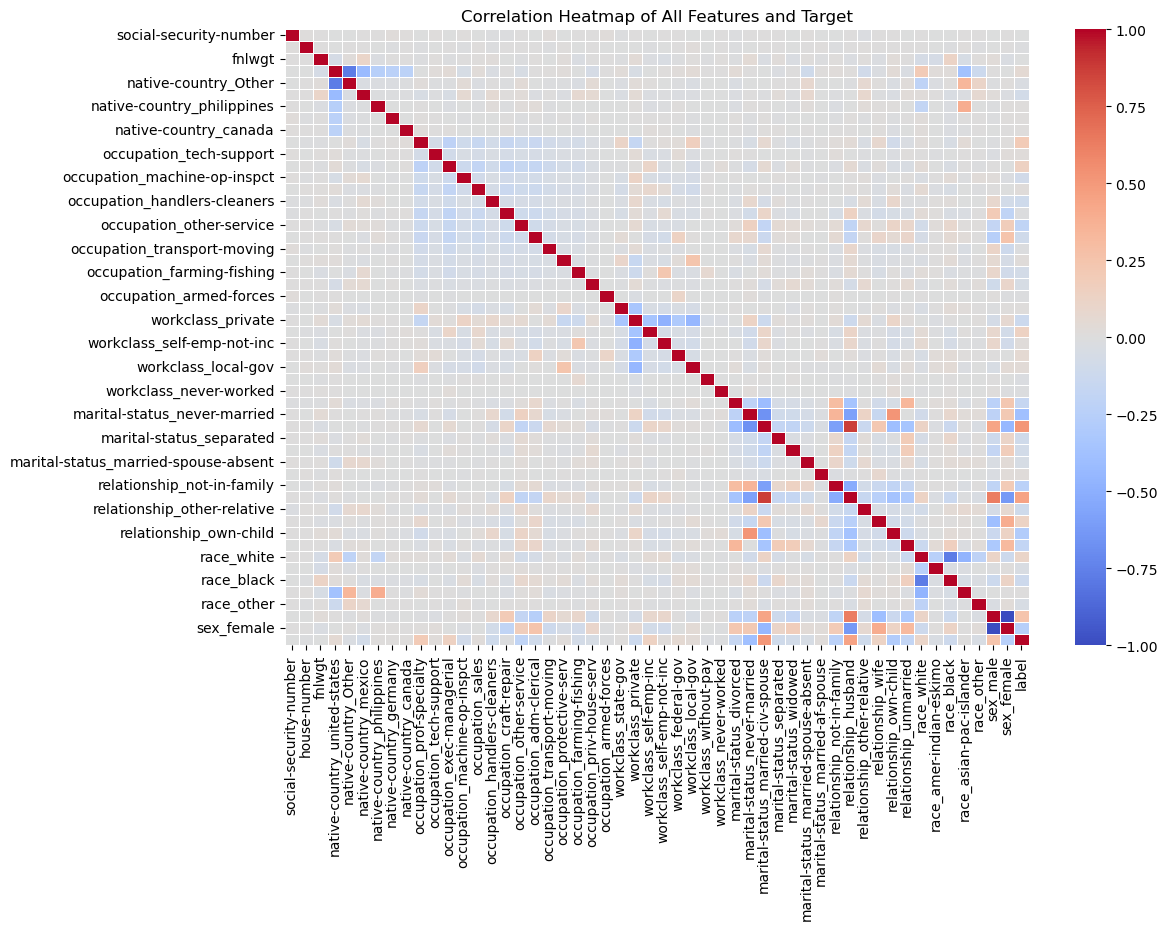

In [67]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณ correlation matrix (เฉพาะ numeric features)
corr_matrix = data_train.corr(numeric_only=True)

# สร้าง heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=False,  # ไม่แสดงตัวเลขบน heatmap
    cmap='coolwarm',
    center=0,
    linewidths=0.5,  # ความหนาของเส้นแบ่ง
    linecolor='white'  # สีของเส้นแบ่ง
)
plt.title("Correlation Heatmap of All Features and Target")
plt.show()



In [69]:
data_train['capitalgain']

id
26890    0.0
933      4.0
25596    0.0
12949    0.0
6681     0.0
        ... 
8695     0.0
2192     2.0
8250     0.0
18511    0.0
16074    0.0
Name: capitalgain, Length: 16720, dtype: object

In [71]:
data_train['capitalloss'].unique()

array([0.0, 3.0, 2.0, 1.0, 4.0], dtype=object)